In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
'''class ThresholdSwitch():
    R_off: float = 5e10
    R_on: float = 3e4
    V_th: float = 0.45
    V_hold: float = 0.05

    def __init__(self,  R_off = R_off, R_on = R_on, V_th = V_th, V_hold = V_hold) -> None:
        self.R_off = R_off
        self.R_on = R_on
        self.V_th =V_th
        self.V_hold =V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if (self.state == 'off') and ((voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and ((voltage) > self.V_th):
            self.state = 'on'
            return self.R_on
        elif (self.state == 'on') and ((voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and ((voltage) < self.V_hold):
            self.state = 'off'
            return self.R_off'''

"class ThresholdSwitch():\n    R_off: float = 5e10\n    R_on: float = 3e4\n    V_th: float = 0.45\n    V_hold: float = 0.05\n\n    def __init__(self,  R_off = R_off, R_on = R_on, V_th = V_th, V_hold = V_hold) -> None:\n        self.R_off = R_off\n        self.R_on = R_on\n        self.V_th =V_th\n        self.V_hold =V_hold\n        self.state = 'off'\n\n    def get_resistance(self, voltage: float):\n        if (self.state == 'off') and ((voltage) < self.V_th):\n            return self.R_off\n        elif (self.state == 'off') and ((voltage) > self.V_th):\n            self.state = 'on'\n            return self.R_on\n        elif (self.state == 'on') and ((voltage) > self.V_hold):\n            return self.R_on\n        elif (self.state == 'on') and ((voltage) < self.V_hold):\n            self.state = 'off'\n            return self.R_off"

In [180]:
import numpy as np

class ThresholdSwitch():
    R_off: float = 5e10
    R_on: float = 3e4
    V_th: float = 0.45
    V_hold: float = 0.05
    distribs: bool = False
    V_th_dist: float = V_th
    V_hold_dist: float = V_hold
    V_th_std: float = 0.03
    V_hold_std: float = 0.01

    def __init__(self,  R_off = R_off, R_on = R_on, V_th = V_th, V_hold = V_hold) -> None:
        self.R_off = R_off
        self.R_on = R_on
        self.V_th = V_th
        self.V_hold = V_hold
        self.state = 'off'

    def params_distibs(self, distribs = distribs, V_th_std = V_th_std, V_hold_std = V_hold_std) -> None:
        self.distribs = distribs
        self.V_th_std = V_th_std
        self.V_hold_std = V_hold_std

    def get_resistance(self, voltage: float) -> float:
        if (self.state == 'off') and ((voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and ((voltage) > self.V_th):
            self.state = 'on'
            if self.distribs == True:
                self.V_th = np.random.normal(loc = self.V_th_dist, scale = self.V_th_std)
            return self.R_on
        elif (self.state == 'on') and ((voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and ((voltage) < self.V_hold):
            self.state = 'off'
            if self.distribs == True:
                self.V_hold = np.random.normal(loc = self.V_hold_dist, scale = self.V_hold_std)
            return self.R_off

0.43319941070795465

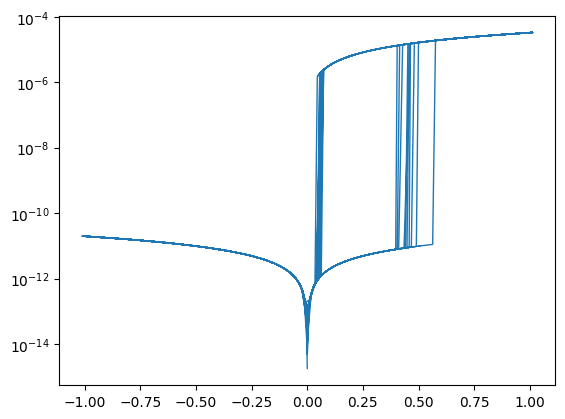

In [186]:
ts = ThresholdSwitch()
ts.params_distibs(distribs=True, V_th_std=0.05)
t  =np.linspace(0, 10 * np.pi, 10 * 1000)
V = np.sin(2 * t) + np.array([np.random.normal(0,0.005) for _ in t])
I = np.array([V[i] / ts.get_resistance(V[i]) for i in range(len(t))])

plt.plot(V, np.abs(I), linewidth = 1)
#plt.ylim([1e-13, 1e-4])
plt.yscale('log')
ts.V_th

$$
C_m \frac{dV(t)}{dt} + \frac{V(t) - V_0}{R_m} = I_{inj}
$$

$$
V(t_{i+1}) = \left( I_{inj} -  \frac{V(t_i) - V_0}{R_m}\right) \frac{dt}{C_m} + V(t_i)
$$

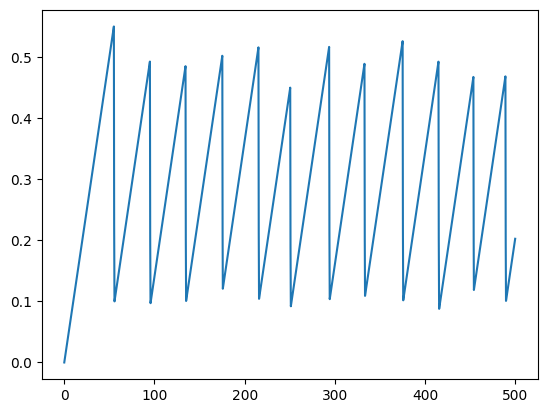

In [184]:
t = np.linspace(0, 500, 100000)
dt = t[1] - t[0]
I_inj = 1e-7
V_0 = 0.05
ts = ThresholdSwitch( V_th=0.5)
ts.params_distibs(distribs=True)
R_m = [ts.get_resistance(0)]
C_m = 1e-5
V = [0]
r = [ts.get_resistance(0)]
for i in range(len(t)-1):
    V.append((I_inj - (V[i] - V_0) / ts.get_resistance(V[i] - V_0)) * dt / C_m + V[i])
    r.append(ts.get_resistance(V[i] - V_0))

plt.plot(t, V)